SARCASTIC 	

forget abt replay..isko to play karna bhi paap hai


A complete disaster from Vipul Shah. Boring watch. Please stay away from this. 1/5.


Cmon..now...don't u think...its high time...u shld concentrate on scripts rather tha costumes..!!!
1 star for Akshay and Aishwarya each and a half star for reviwing the old 70's memories... ;)       ........... nothn else spl..!


The film is made with the right intentions but quickly turns into a corny farce.Sincere performances by Akshay and Ash but the script is overly simple and weak...the over-acting by VJ Aditya doesn't help much either.


Now thats 2 hrs of my life am not getting back....


borin movie with an astoundin amount of over acting :(


AKKI-ASH - VIPUL...

WHY DID U MAKE THIS FLICK?


Only if it was possible to recreate the magic of a superhit film easily. But it is certainly not Bollywood's style to understand a fact as simple as that. So here we are at our plagiarising best ripping off a superhit time travel comedy t

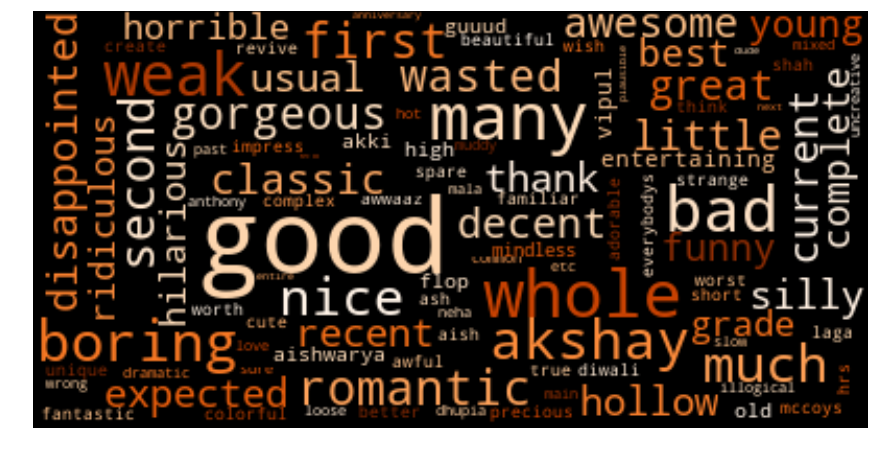

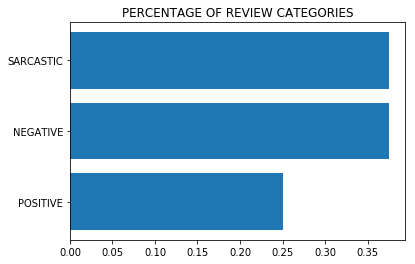

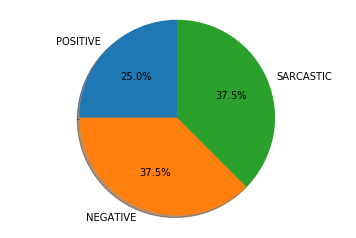

In [38]:
from bs4 import BeautifulSoup
import requests
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

final=[]
def filter_words(data):
    final=[]
    words = tokenizer.tokenize(data.text)
    words=[i.lower() for i in words]
    for word,pos in nltk.pos_tag(words):
        if pos=='JJ' or pos=='JJR' or pos=='JJS':
            final.append(word)
    return(final)
    
def sent_check(words):
    num=pos=neg=med=0
    words=filter_words(words)
    if len(words) == 0:
        return [];
    else:
        for w in words:
            final.append(w)
            num = num +1
            score = a.polarity_scores(w)
            if score['compound']>=0.05 :
                pos+=1
            elif score['compound']<= -0.05 :
                neg+=1
            else:
                med=med+1

        pos_perc = (pos/num)*100
        neg_perc = (neg/num)*100
        med_perc = (med/num)*100

        return([pos_perc,med_perc,neg_perc])

a = SentimentIntensityAnalyzer()
url = "https://www.rottentomatoes.com/m/action_replayy/reviews?type=user"
driver = webdriver.Chrome()
driver.get(url)

pos_list=[]
neg_list=[]
sar_list=[]
while True:
    data_list=[]
    ratings=[]
    #rating_num=[]
    #data_num=[]
    rate_str=[]
    
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    data=soup.find_all("p", {"class": "audience-reviews__review js-review-text clamp clamp-8 js-clamp"})
    data_list.append(data)
    ratings.append(soup.find_all("span",{"class":"star-display"}))
    tokenizer = RegexpTokenizer(r'[a-zA-Z]{3,}')
    stop_word = set(stopwords.words("english"))

    data_list=data_list[0]
    ratings=ratings[0]
    for i in range(len(ratings)):
        rate_str.append(str(ratings[i]))
        
    full='<span class="star-display__filled ">'
    half='<span class="star-display__half ">'
    for i,j in zip(data_list,rate_str):
        full_rate=j.count(full)
        half_rate=j.count(half)
        final_rate=full_rate+0.5*half_rate
        rating_num=(final_rate)
        data_num=(sent_check(i))
        if len(data_num)!=0:
            ind=data_num.index(max(data_num))
            if ind !=0.0: 
                if (ind==0 or data_num[0]==data_num[2]) and rating_num<3:
                    sar_list.append(i)
                elif ind==2:
                    neg_list.append(i)
                elif (ind==1 or ind==0) and rating_num>=3:
                    pos_list.append(i)

    #print(rating_num)
    #print(data_num)
    try:
        driver.find_element_by_class_name("prev-next-paging__button-right").click()
    except :
        break
rev=[]    
def unique(g_list):
    my_set=set(g_list)
    g_list=list(my_set)
    for i in g_list:
        print(i.text)
        print("\n")
        rev.append(i.text)
print("SARCASTIC \t\n")
unique(sar_list)
print("POSITIVE \t\n")
unique(pos_list)
print("NEGATIVE \t\n")
unique(neg_list)
def u_len(g_list):
    my_set=set(g_list)
    g_list=list(my_set)
    return len(g_list)
tot_len=(u_len(pos_list)+u_len(neg_list)+u_len(sar_list))
p=(u_len(pos_list)/tot_len)
n=(u_len(neg_list)/tot_len)
s=(u_len(sar_list)/tot_len)

#VISUALIZATION

#WORDCLOUD
word=''
for i in final:
    word=word+i+' '
wordcloud = WordCloud(max_font_size=50, max_words=100, colormap="Oranges_r", collocations=False).generate(word)
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

#HORIZONTAL BAR CHART
fig, ax = plt.subplots()
y=('POSITIVE','NEGATIVE','SARCASTIC')
x=[p,n,s]
ax.barh(y,x,align='center')
ax.set_title('PERCENTAGE OF REVIEW CATEGORIES')

#PIE CHART
fig1, ax1 = plt.subplots()
ax1.pie(x, labels=y, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

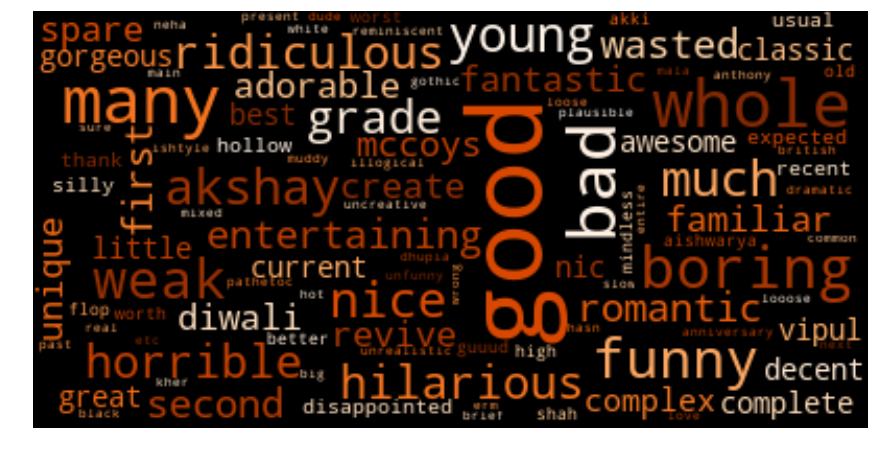

In [2]:
word=''
for i in final:
    word=word+i+' '
wordcloud = WordCloud(max_font_size=50, max_words=100, colormap="Oranges_r", collocations=False).generate(word)
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [40]:
rev.to_csv('reviews.csv')

AttributeError: 'list' object has no attribute 'to_csv'

In [41]:
import pandas as pd
df=pd.read_csv('update.csv')

In [42]:
df=df.drop(columns='hiii')

In [43]:
rev

['forget abt replay..isko to play karna bhi paap hai',
 'A complete disaster from Vipul Shah. Boring watch. Please stay away from this. 1/5.',
 "Cmon..now...don't u think...its high time...u shld concentrate on scripts rather tha costumes..!!!\n1 star for Akshay and Aishwarya each and a half star for reviwing the old 70's memories... ;)       ........... nothn else spl..!",
 "The film is made with the right intentions but quickly turns into a corny farce.Sincere performances by Akshay and Ash but the script is overly simple and weak...the over-acting by VJ Aditya doesn't help much either.",
 'Now thats 2 hrs of my life am not getting back....',
 'borin movie with an astoundin amount of over acting :(',
 'AKKI-ASH - VIPUL...\n\nWHY DID U MAKE THIS FLICK?',
 "Only if it was possible to recreate the magic of a superhit film easily. But it is certainly not Bollywood's style to understand a fact as simple as that. So here we are at our plagiarising best ripping off a superhit time travel co

In [44]:
df['reviews']=rev

In [46]:
df.to_csv('reviews.csv')

In [36]:
if 5!=8:
    print("dgd")

dgd
